# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install matplotlib pandas seaborn scikit-learn numpy 

In [2]:
#Libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", 101)

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [3]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [4]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [5]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

##### Observation

- Features to be dropped are :-

    - Id-the primary key of data has no bearing on the output
    
    - Timestamp-Timestamp will be parse to day,time and month 
    
    - Area income as more 25% is null values , more than admissible range of bad data

In [6]:
data.drop('id',axis=1,inplace=True)
data.drop('Area Income',axis=1,inplace=True)

In [7]:
#Description
data.describe()

,Daily Time Spent on Site,Age,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,65.120650,35.816000,179.592310,0.474000,0.503000
std,15.781456,8.782669,43.735785,0.499573,0.500241
min,32.600000,19.000000,105.000000,0.000000,0.000000
25%,51.450000,29.000000,137.885000,0.000000,0.000000
50%,68.390000,35.000000,182.425000,0.000000,1.000000
75%,78.572500,41.250000,217.707500,1.000000,1.000000
max,91.370000,61.000000,269.960000,1.000000,1.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 1000 non-null   object 
 1   Daily Time Spent on Site  1000 non-null   float64
 2   Age                       1000 non-null   int64  
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   gender                    1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Clicked                   1000 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [9]:
print("Number of features :",data.shape[1])
print("Number of rows :",data.shape[0])

Number of features : 8
Number of rows : 1000


In [10]:
data.Clicked.value_counts()

1    503
0    497
Name: Clicked, dtype: int64

In [11]:
data.isnull().sum()

Timestamp                   0
Daily Time Spent on Site    0
Age                         0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
Clicked                     0
dtype: int64

### 24% of Area Income data is null

In [12]:
data.Clicked.value_counts()

1    503
0    497
Name: Clicked, dtype: int64

### No Class imbalance

In [13]:
from datetime import datetime
data.Timestamp=pd.to_datetime(data.Timestamp )
data['Month']=pd.DatetimeIndex(data['Timestamp']).month
data['Year']=pd.DatetimeIndex(data['Timestamp']).year
data['Day']=pd.DatetimeIndex(data['Timestamp']).day
data['hour']=pd.DatetimeIndex(data['Timestamp']).hour
data['minute']=pd.DatetimeIndex(data['Timestamp']).minute
data['second']=pd.DatetimeIndex(data['Timestamp']).second
data.drop('Timestamp',axis=1,inplace=True)
data

,Daily Time Spent on Site,Age,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Month,Year,Day,hour,minute,second
0,80.67,34,239.76,Seamless impactful info-mediaries,0,Portugal,0,1,2016,1,2,52,10
1,68.01,25,188.32,Ameliorated actuating workforce,1,Afghanistan,0,1,2016,1,3,35,35
2,80.94,36,239.94,Self-enabling local strategy,0,Bermuda,0,1,2016,1,5,31,22
3,78.77,28,211.83,Public-key intangible Graphical User Interface,0,Guam,0,1,2016,1,8,27,6
4,36.56,29,195.89,Team-oriented bi-directional secured line,0,Uganda,1,1,2016,1,15,14,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,82.12,54,132.66,Triple-buffered human-resource complexity,1,Cuba,1,6,2016,3,17,32,47
996,45.01,26,178.35,Virtual 5thgeneration emulation,0,Brazil,1,6,2016,3,21,43,21
997,36.62,36,163.00,Front-line incremental access,0,Guyana,1,6,2016,4,9,13,29
998,80.46,29,230.78,Mandatory coherent groupware,0,India,0,6,2016,4,9,13,29


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Daily Internet Usage      1000 non-null   float64
 3   Ad Topic Line             1000 non-null   object 
 4   gender                    1000 non-null   int64  
 5   Country                   1000 non-null   object 
 6   Clicked                   1000 non-null   int64  
 7   Month                     1000 non-null   int64  
 8   Year                      1000 non-null   int64  
 9   Day                       1000 non-null   int64  
 10  hour                      1000 non-null   int64  
 11  minute                    1000 non-null   int64  
 12  second                    1000 non-null   int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 101.7+ KB


#### Observation
To be encoded :-
    
    - Ad Topic Line :- as the advertisement topic line could have an impact on the user clicking
    
    - Country :- The country of origin might determine the user preferences

- Hence not to be dropped

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Ad Topic Line'] = le.fit_transform(data['Ad Topic Line'])
data['Country'] = le.fit_transform(data['Country'])

In [16]:
data.head()

,Daily Time Spent on Site,Age,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked,Month,Year,Day,hour,minute,second
0,80.67,34,239.76,645,0,166,0,1,2016,1,2,52,10
1,68.01,25,188.32,14,1,0,0,1,2016,1,3,35,35
2,80.94,36,239.94,661,0,23,0,1,2016,1,5,31,22
3,78.77,28,211.83,565,0,82,0,1,2016,1,8,27,6
4,36.56,29,195.89,723,0,216,1,1,2016,1,15,14,24


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [17]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia


### Preprocessing steps similar to train data on test data for later testing

In [18]:
test_data.drop('id',axis=1,inplace=True)
test_data.Timestamp=pd.to_datetime(test_data.Timestamp )
test_data['Month']=pd.DatetimeIndex(test_data['Timestamp']).month
test_data['Year']=pd.DatetimeIndex(test_data['Timestamp']).year
test_data['Day']=pd.DatetimeIndex(test_data['Timestamp']).day
test_data['hour']=pd.DatetimeIndex(test_data['Timestamp']).hour
test_data['minute']=pd.DatetimeIndex(test_data['Timestamp']).minute
test_data['second']=pd.DatetimeIndex(test_data['Timestamp']).second

test_data.drop('Timestamp',axis=1,inplace=True)
test_data.drop('Area Income',axis=1,inplace=True)

lt = LabelEncoder()
test_data['Ad Topic Line'] = le.fit_transform(test_data['Ad Topic Line'])
test_data['Country'] = le.fit_transform(test_data['Country'])

In [19]:
test_data.isna().sum()

Daily Time Spent on Site    0
Age                         0
Daily Internet Usage        0
Ad Topic Line               0
gender                      0
Country                     0
Month                       0
Year                        0
Day                         0
hour                        0
minute                      0
second                      0
dtype: int64

In [20]:
test_data.shape

(300, 12)

In [21]:

from sklearn.model_selection import train_test_split

y = data["Clicked"]
X = data.drop("Clicked", axis=1)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=1)

In [22]:
# scaling the test data set

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_val)

In [63]:
def models(X_train, Y_train):

# use logistic regration 

    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)
    
# use k-neighbors
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p=2)
    knn.fit(X_train, Y_train)
    
# use SVC 
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state = 0)
    svc_rbf.fit(X_train, Y_train)
    
#use GassianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

#use decision tree 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)
    
#use random forest 
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)
    
#use Extra Tree Classifier
    from sklearn.ensemble import ExtraTreesClassifier
    extratree = ExtraTreesClassifier()
    extratree.fit(X_train, Y_train)
    
    
    print('LogisticRegression', log.score(X_train, Y_train))
    print('KNeighborsClassifier',knn.score(X_train, Y_train))
    print('SVC',svc_rbf.score(X_train, Y_train))
    print('GaussianNB',gauss.score(X_train, Y_train))
    print('DecisionTreeClassifier',tree.score(X_train, Y_train))
    print('RandomForestClassifier',forest.score(X_train, Y_train))
    print('ExtraTreeClassifier',extratree.score(X_train, Y_train))

    return log, knn, svc_rbf, gauss, tree, forest , extratree

In [64]:
model = models(X_train, y_train)

LogisticRegression 0.8525
KNeighborsClassifier 0.88
SVC 0.89
GaussianNB 0.855
DecisionTreeClassifier 1.0
RandomForestClassifier 0.9925
ExtraTreeClassifier 1.0


### Verification

In [65]:
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score


In [70]:
for i in range(7):
    print(model[i])
    pred = model[i].predict(X_val)
    print("Accuracy Score :",accuracy_score(y_val,pred))
    print("Recall score :",recall_score(y_val,pred))
    print('Mean Absolute Error of {}:'.format(model[i]),mean_absolute_error( y_val,pred))
    print('Mean Square Error of {}:'.format(model[i]), mean_squared_error( y_val,pred))
    print('R_Squared Score of {}:'.format(model[i]), r2_score(y_val,pred))
    print( classification_report(y_val, pred,target_names=["Not Clicked","Clicked"]) )
    print("--------------------------------------------------------------------------------------------------")

ExtraTreeClassifier(random_state=228665763)
Accuracy Score : 1.0
Recall score : 1.0
Mean Absolute Error of ExtraTreeClassifier(random_state=228665763): 0.0
Mean Square Error of ExtraTreeClassifier(random_state=228665763): 0.0
R_Squared Score of ExtraTreeClassifier(random_state=228665763): 1.0
              precision    recall  f1-score   support

 Not Clicked       1.00      1.00      1.00       104
     Clicked       1.00      1.00      1.00        96

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

--------------------------------------------------------------------------------------------------
ExtraTreeClassifier(random_state=1287918926)
Accuracy Score : 1.0
Recall score : 1.0
Mean Absolute Error of ExtraTreeClassifier(random_state=1287918926): 0.0
Mean Square Error of ExtraTreeClassifier(random_state=1287918926): 0.0
R_Squared Score of ExtraTreeClassifier(random_state



**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


[0.24865104 0.10976717 0.2715933  0.05273104 0.01821419 0.05301714
 0.04290084 0.         0.05041461 0.05061807 0.05056572 0.05152689]


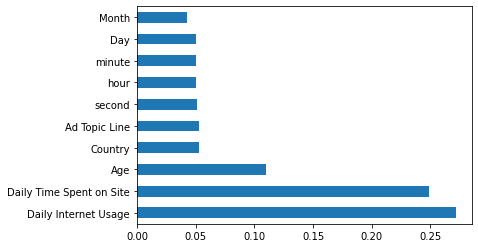

In [67]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## Features with most importance are "Daily Time Spent on Site" and "Daily Internet Usage", "Age" also plays an important factor

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [49]:
sample_output = pd.read_csv('sample_output.csv')

In [52]:
submission_preds = model[4].predict(test_data)

In [56]:
submission_df = pd.DataFrame({"id":sample_output['id'].values,
                   "Clicked": submission_preds,
                  })

In [57]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---